# Python Dictionaries Implementation

*Implement dictionaries with different data structures (red-black trees and hash tables) from scratch and analyze their performance in different scenarios*

### Exam Notes

About the presentation:

- It should be 15-20 minutes, with additional 5 minutes of questions (either during the talk or afterwards)

- Your presentation should focus on the algorithmic part of whatever you chose

- Questions can also be about the related parts in the course (if your algorithm uses, e.g., a binary search tree, we might ask you about properties and applications of binary search trees)

## 1.0 First Implementation: Hash Tables

Summary: we have a key, we send it through an hash function that it is going to hashing it really fast and then map the output into a memory address where we will store our data. 

### Time Complexity:
 - Insert: O(1)
 - Lookup: O(1)
 - Delete: O(1)
 - Search: O(1)
 

### How to Implement Hash Tables
1. Use a fast Hash Function. Eg. SHA-256 takes a very long time to compute the hash and it is overly complex.
2. Implement Linked-List to solve Hash Collisions


### 1.1 Naive Hash Function

In [1]:
class HashTable():

    def __init__(self, size):
        #initiliaze the data array
        self.data = [None] * size
    
    # O(1)
    def add(self, key, value):
        # address: where we want to store the information
        # through the _hash function
        address = self._hash(key)
        
        # if the space in address is still empty, assign 'value'
        if not self.data[address]:
            self.data[address] = [(key, value)]
        else:
            self.data[address].append((key, value))
    
    # If no collision: O(1)
    def get(self, key):
        # find the address of the given key, through the _hash function
        address = self._hash(key)    
        current_list = self.data[address]
        
        # if there is something at this address return saved value
        if current_list:
            # Loop over the items saved at address
            # O(N) worst case with collisions
            for i in range(len(current_list)):
                if current_list[i][0] == key:
                    return current_list[i][1]
            raise Exception("Key not found")
        else:
            raise Exception("Key not found")

            
    # iterate over the saved keys on our Hash Table
    # That's a drawback of hashtables, we have to loop over 
    # each space even if it's empty and they are unordered
    def keys(self):
        keys_array = []
        
        # loop over the spaces of self.data 
        for i in range(len(self.data)):
            # if array is saved in space, loop over and append keys
            if self.data[i]:
                
                if len(self.data[i]) > 1:
                    for j in range(len(self.data[i])):
                        keys_array.append(self.data[i][j][0])
                else:
                    keys_array.append(self.data[i][0][0])
        
        return keys_array
        

In [2]:
class NaiveHashTable(HashTable):

    # O(1))
    def _hash(self, key):
        assert (type(key) == str or type(key) == int or type(key) == float), "Key type not allowed"
        if type(key) == str:
            hash_value = 0
            for i in range(len(key)):
                hash_value = (hash_value + ord(key[i]) * i) % len(self.data)
            return hash_value
        else:
            return int(key) % len(self.data)

In [3]:
class DefaultHashTable(HashTable):

    def _hash(self, key):
        """
        Return the hash value of the object (if it has one). Hash values are integers. 
        They are used to quickly compare dictionary keys during a dictionary lookup. 
        Numeric values that compare equal have the same hash value 
        (even if they are of different types, as is the case for 1 and 1.0).
        https://docs.python.org/2/library/functions.html#hash
        """
        return hash(key) % len(self.data)

In [4]:
import hashlib
import struct

class MD5HashTable(HashTable):

    def _hash(self, key):
        if type(key) == str:
            md5_hash_hex = hashlib.md5(key.encode()).hexdigest()
        elif type(key) == int:
            md5_hash_hex = hashlib.md5(struct.pack('<i', key)).hexdigest()
        elif type(key) == float:
            md5_hash_hex = hashlib.md5(struct.pack('<f', key)).hexdigest()
        return int(md5_hash_hex, 16) % len(self.data)

In [5]:
import hashlib
import struct

class SHA256HashTable(HashTable):

    def _hash(self, key):
        md5_hash_hex = hashlib.sha256(key.encode()).hexdigest()
        return int(md5_hash_hex, 16) % len(self.data)

I know there are things like SHA-256 and such, but these algorithms are designed to be secure, which usually means they are slower than algorithms that are less unique. I want a hash algorithm designed to be fast, yet remain fairly unique to avoid collisions. 


The **Jenkins hash** and its variants require more computation, but they give a better distribution and thus will generally make for fewer collisions and a smaller required table size. [Link](https://stackoverflow.com/questions/22741966/how-to-choose-size-of-hash-table)

In [6]:
# -*- coding: utf-8 -*-
# Need to constrain U32 to only 32 bits using the & 0xFFFFFFFF
# since Python has no native notion of integers limited to 32 bit
# http://docs.python.org/library/stdtypes.html#numeric-types-int-float-long-complex
"""Original copyright notice:
    By Bob Jenkins, 1996.  bob_jenkins@burtleburtle.net.  You may use this
    code any way you wish, private, educational, or commercial. Its free.
来自七仔个人补充说明：
    这个是纯Python实现的，运行的速度还是蛮快的，温馨提示，您将可以通过修改某些位操作，可以作为自己的私有的加密方式，
    然后可以作为一个校验码来使用！欢迎大家一起交流学习，感谢！
    
Github: https://github.com/qqizai/Jenkins-Hash/blob/master/jenkinshash.py
"""

import sys


class JenkinsHashTable(HashTable):

    def _hash(self, key):
        return self.hashlittle(key) % len(self.data)
        
        
    def rot(self, x, k):
        return (((x)<<(k)) | ((x)>>(32-(k))))

    def mix(self, a, b, c):
        a &= 0xFFFFFFFF; b &= 0xFFFFFFFF; c &= 0xFFFFFFFF
        a -= c; a &= 0xFFFFFFFF; a ^= self.rot(c,4);  a &= 0xFFFFFFFF; c += b; c &= 0xFFFFFFFF
        b -= a; b &= 0xFFFFFFFF; b ^= self.rot(a,6);  b &= 0xFFFFFFFF; a += c; a &= 0xFFFFFFFF
        c -= b; c &= 0xFFFFFFFF; c ^= self.rot(b,8);  c &= 0xFFFFFFFF; b += a; b &= 0xFFFFFFFF
        a -= c; a &= 0xFFFFFFFF; a ^= self.rot(c,16); a &= 0xFFFFFFFF; c += b; c &= 0xFFFFFFFF
        b -= a; b &= 0xFFFFFFFF; b ^= self.rot(a,19); b &= 0xFFFFFFFF; a += c; a &= 0xFFFFFFFF
        c -= b; c &= 0xFFFFFFFF; c ^= self.rot(b,4);  c &= 0xFFFFFFFF; b += a; b &= 0xFFFFFFFF
        return a, b, c


    def final(self, a, b, c):
        a &= 0xFFFFFFFF; b &= 0xFFFFFFFF; c &= 0xFFFFFFFF
        c ^= b; c &= 0xFFFFFFFF; c -= self.rot(b,14); c &= 0xFFFFFFFF
        a ^= c; a &= 0xFFFFFFFF; a -= self.rot(c,11); a &= 0xFFFFFFFF
        b ^= a; b &= 0xFFFFFFFF; b -= self.rot(a,25); b &= 0xFFFFFFFF
        c ^= b; c &= 0xFFFFFFFF; c -= self.rot(b,16); c &= 0xFFFFFFFF
        a ^= c; a &= 0xFFFFFFFF; a -= self.rot(c,4);  a &= 0xFFFFFFFF
        b ^= a; b &= 0xFFFFFFFF; b -= self.rot(a,14); b &= 0xFFFFFFFF
        c ^= b; c &= 0xFFFFFFFF; c -= self.rot(b,24); c &= 0xFFFFFFFF
        return a, b, c


    def hashlittle2(self, data, initval=0, initval2=0):
        length = lenpos = len(data)

        a = b = c = (0xdeadbeef + (length) + initval)

        c += initval2; c &= 0xFFFFFFFF

        p = 0  # 字符串偏移，进行位操作运算
        while lenpos > 12:
            a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16) + (ord(data[p+3])<<24)); a &= 0xFFFFFFFF
            b += (ord(data[p+4]) + (ord(data[p+5])<<8) + (ord(data[p+6])<<16) + (ord(data[p+7])<<24)); b &= 0xFFFFFFFF
            c += (ord(data[p+8]) + (ord(data[p+9])<<8) + (ord(data[p+10])<<16) + (ord(data[p+11])<<24)); c &= 0xFFFFFFFF
            a, b, c = mix(a, b, c)
            p += 12
            lenpos -= 12

        if lenpos == 12:
            c += (ord(data[p+8]) + (ord(data[p+9])<<8) + (ord(data[p+10])<<16) + (ord(data[p+11])<<24)); b += (ord(data[p+4]) + (ord(data[p+5])<<8) + (ord(data[p+6])<<16) + (ord(data[p+7])<<24)); a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16) + (ord(data[p+3])<<24));
        if lenpos == 11:
            c += (ord(data[p+8]) + (ord(data[p+9])<<8) + (ord(data[p+10])<<16)); b += (ord(data[p+4]) + (ord(data[p+5])<<8) + (ord(data[p+6])<<16) + (ord(data[p+7])<<24)); a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16) + (ord(data[p+3])<<24));
        if lenpos == 10:
            c += (ord(data[p+8]) + (ord(data[p+9])<<8)); b += (ord(data[p+4]) + (ord(data[p+5])<<8) + (ord(data[p+6])<<16) + (ord(data[p+7])<<24)); a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16) + (ord(data[p+3])<<24));
        if lenpos == 9:
            c += (ord(data[p+8])); b += (ord(data[p+4]) + (ord(data[p+5])<<8) + (ord(data[p+6])<<16) + (ord(data[p+7])<<24)); a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16) + (ord(data[p+3])<<24));
        if lenpos == 8:
            b += (ord(data[p+4]) + (ord(data[p+5])<<8) + (ord(data[p+6])<<16) + (ord(data[p+7])<<24)); a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16) + (ord(data[p+3])<<24));
        if lenpos == 7:
            b += (ord(data[p+4]) + (ord(data[p+5])<<8) + (ord(data[p+6])<<16)); a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16) + (ord(data[p+3])<<24));
        if lenpos == 6:
            b += ((ord(data[p+5])<<8) + ord(data[p+4])); a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16) + (ord(data[p+3])<<24))
        if lenpos == 5:
            b += (ord(data[p+4])); a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16) + (ord(data[p+3])<<24));
        if lenpos == 4:
            a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16) + (ord(data[p+3])<<24))
        if lenpos == 3:
            a += (ord(data[p+0]) + (ord(data[p+1])<<8) + (ord(data[p+2])<<16))
        if lenpos == 2:
            a += (ord(data[p+0]) + (ord(data[p+1])<<8))
        if lenpos == 1:
            a += ord(data[p+0])
        a &= 0xFFFFFFFF; b &= 0xFFFFFFFF; c &= 0xFFFFFFFF
        if lenpos == 0:
            return c, b

        a, b, c = self.final(a, b, c)

        return c, b  # 这里是原版，您可以修改这里，返回不同的结果，
        # 例如py3写法(py2可能要注意int和long的转换)：
        # return ((int(a)) << 24) | (int(b) & 0xFFFFFF)  # 这里返回的值是一个，后面的记得也相应修改   


    def hashlittle(self, data, initval=0):
        c, b = self.hashlittle2(data, initval, 0)
        return c

# Analyze Performance

In [41]:
import pandas as pd
import statistics

In [125]:
def insert_keys(hashtable, n=10000):
    for i in range(n):
        hashtable.add(str(i), i)
        
def get_values(hashtable, n=10000):
    for i in range(n):
        hashtable.get(str(i))

In [126]:
def insert_keys_d(d, n=10000):
    for i in range(n):
        d[str(i)] = i
        
def get_values_d(d, n=10000):
    for i in range(n):
        d.get(str(i))

In [127]:
size = 50

hashtables = [
    ('Naive', NaiveHashTable(size)),
    ('Default', DefaultHashTable(size)),
    ('MD5', MD5HashTable(size)),
    ('SHA256', SHA256HashTable(size)),
    ('Jenkins', JenkinsHashTable(size))
]

In [148]:
def get_hashtable(kind, size, initialize=False):
    hashtables = {
        'Naive': NaiveHashTable(size),
        'Default': DefaultHashTable(size),
        'MD5': MD5HashTable(size),
        'SHA256': SHA256HashTable(size),
        'Jenkins': JenkinsHashTable(size)
    }
        
    return hashtables[kind]

In [139]:
def get_results_insert_key(kind, size_array):
    res = []
    for size in size_array:
        print(kind, size)
        hashtable = get_hashtable(kind, size)
        x = %timeit -o -n 10 insert_keys(hashtable)
        res.append(x)
    return [statistics.mean(i.timings) for i in res]

In [154]:
def get_results(kind, size_array):
    res_insert = []
    res_get = []
    for size in size_array:
        print(kind, size)
        hashtable = get_hashtable(kind, size)
        insert = %timeit -o -n 10 insert_keys(hashtable)
        get = %timeit -o -n 10 get_values(hashtable, n=100)
        res_insert.append(insert)
        res_get.append(get)
    return res_insert, res_get

In [150]:
hashtable_kind = ['Naive', 'Default', 'MD5', 'SHA256', 'Jenkins']
size_array = [2, 10, 50, 250, 500, 1000, 2000, 5000, 25000, 100000]

results = []
for kind in hashtable_kind:
    results.append((kind, get_results(kind, size_array)))

Naive 2
21.3 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
432 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive 10
19.4 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
208 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive 50
21.6 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
240 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive 250
20.8 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
199 µs ± 9.88 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive 500
20.5 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
206 µs ± 8.31 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive 1000
20.5 ms ± 982 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
244 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive 2000
20.8 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
260 µs ± 17.2 µs pe

In [153]:
results[1]

('Default',
 ([<TimeitResult : 9.86 ms ± 820 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>,
   <TimeitResult : 9.9 ms ± 692 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>,
   <TimeitResult : 10 ms ± 750 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>,
   <TimeitResult : 10.1 ms ± 881 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>,
   <TimeitResult : 10.4 ms ± 712 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>,
   <TimeitResult : 10.2 ms ± 695 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>,
   <TimeitResult : 10.5 ms ± 691 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>,
   <TimeitResult : 11.5 ms ± 754 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>,
   <TimeitResult : 11 ms ± 968 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>,
   <TimeitResult : 10.9 ms ± 958 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)>],
  [None, None, None, None, None, None, None, None, None, None]))

In [140]:
hashtable_kind = ['Naive', 'Default', 'MD5', 'SHA256', 'Jenkins']
size_array = [2, 10, 50, 250, 500, 1000, 2000, 5000, 25000, 100000]

results = []
for kind in hashtable_kind:
    results.append((kind, get_results_insert_key(kind, size_array)))

Naive 2
20.3 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive 10
19.8 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive 50
20.4 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive 250


KeyboardInterrupt: 

In [138]:
df = pd.DataFrame([res[1] for res in results]).T
df.columns=[res[0] for res in results]

In [113]:
df.index = size_array

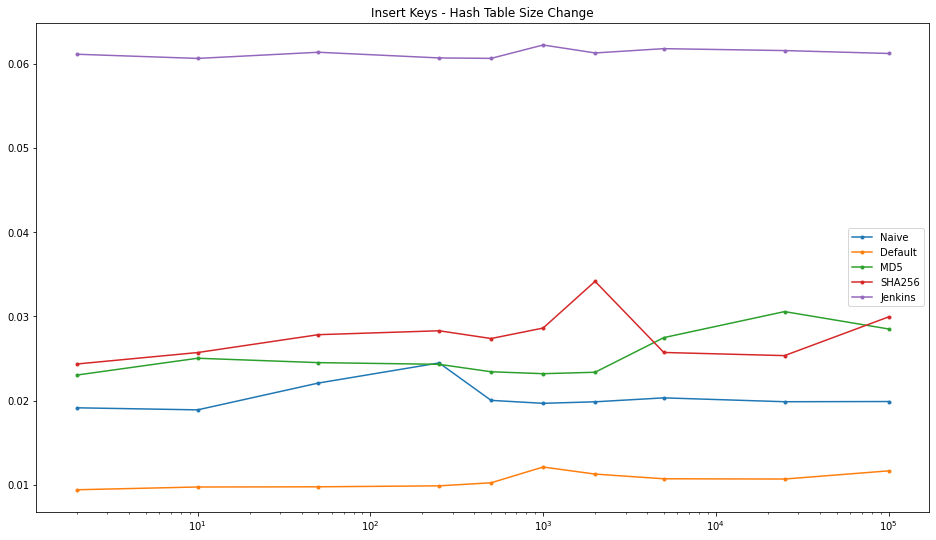

In [123]:
ax = df.plot(figsize=(16,9), style='.-');
ax.set_xscale('log');
ax.set_title('Insert Keys - Hash Table Size Change');

In [146]:
def get_results_get_values(kind, size_array):
    res = []
    for size in size_array:
        print(kind, size)
        hashtable = get_hashtable(kind, size, True)
        x = %timeit -o -n 10 get_values(hashtable)
        res.append(x)
    return [statistics.mean(i.timings) for i in res]

In [ ]:
#initialize hashtables
hashtables = {
    'Naive': NaiveHashTable(size),
    'Default': DefaultHashTable(size),
    'MD5': MD5HashTable(size),
    'SHA256': SHA256HashTable(size),
    'Jenkins': JenkinsHashTable(size)
}


In [147]:
hashtable_kind = ['Naive', 'Default', 'MD5', 'SHA256', 'Jenkins']
size_array = [2, 10, 50, 250, 500, 1000, 2000, 5000, 25000, 100000]

results = []
for kind in hashtable_kind:
    results.append((kind, get_results_get_values(kind, size_array)))

Naive 2


KeyboardInterrupt: 

In [136]:
get_results_get_values('Naive', size_array)

Naive 2


Exception: Key not found

In [17]:
res = []

for name, hashtable in hashtables:
    print(name)
    x = %timeit -o -n 10 insert_keys(hashtable)
    res.append(x)
    print('\n')

print('Built-in Dict')
d = {}
x = %timeit -o -n 10 insert_keys_d(d)
res.append(x)

Naive
21.2 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Default
9.59 ms ± 448 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


MD5
24.8 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


SHA256
32.2 ms ± 3.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Jenkins
62.2 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Red Black Tree
55.1 ms ± 4.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Built-in Dict
2.84 ms ± 267 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
pd.DataFrame(zip([i.timings for i in res][0], [i.timings for i in res][1], [i.timings for i in res][2]))

,0,1,2
0,0.023461,0.009335,0.025072
1,0.023465,0.009598,0.025037
2,0.022510,0.009951,0.021978
3,0.022880,0.010489,0.022005
4,0.018390,0.009427,0.028476
5,0.018340,0.009169,0.023345
6,0.019143,0.009144,0.027976


In [22]:
pd.DataFrame(zip(i.timings for i in res))

,0
0,"[0.023461271300000065, 0.02346538389999999, 0...."
1,"[0.009335405799999918, 0.009597756000000146, 0..."
2,"[0.025071532999999847, 0.0250370482000001, 0.0..."
3,"[0.03908235980000008, 0.030971586300000097, 0...."
4,"[0.06134834229999982, 0.061428022500000165, 0...."
5,"[0.061576328000000305, 0.0518430433000006, 0.0..."
6,"[0.0034652227000002258, 0.002905608799999726, ..."


In [412]:
for name, hashtable in hashtables:
    print(name)
    %timeit -n 10 get_values(hashtable, n=100)
    print('\n')

print('Built-in Dict')
%timeit -n 10 get_values(d, n=100)

Naive
294 µs ± 71.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Default
The slowest run took 11.86 times longer than the fastest. This could mean that an intermediate result is being cached.
371 µs ± 545 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


MD5
The slowest run took 4.90 times longer than the fastest. This could mean that an intermediate result is being cached.
479 µs ± 399 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


SHA256
The slowest run took 4.31 times longer than the fastest. This could mean that an intermediate result is being cached.
507 µs ± 373 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Jenkins
895 µs ± 68.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Red Black Tree
1.37 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Built-in Dict
41.8 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [398]:
for name, hashtable in hashtables:
    print(name)
    %timeit -n 2 hashtable.keys()
    print('\n')

print('Built-in Dict')
%timeit -n 2 d.keys()

Naive
1.41 s ± 69.7 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)


Default
4.05 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)


MD5
1.2 s ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)


SHA256
937 ms ± 31.9 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)


Jenkins
924 ms ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)


Built-in Dict
268 ns ± 137 ns per loop (mean ± std. dev. of 7 runs, 2 loops each)


In [375]:
hashtables[0][1].get('grapes')

'ciao'

In [360]:
myHashTable = JenkinsHashTable(50)

In [ ]:
myHashTable.add(24, 'ciao')
myHashTable.add(245.6, 'bella')

In [352]:
myHashTable.add('grapes', 'ciao')
myHashTable.add('apples', 100)
myHashTable.add('oranges', 500)

In [346]:
print(myHashTable.get('grapes'))
print(myHashTable.get('apples'))
print(myHashTable.get('oranges'))

ciao
100
500


In [ ]:
print(myHashTable.get(24))
print(myHashTable.get(245.6))

In [348]:
myHashTable.keys()

['apples', 'grapes', 'oranges']

In [349]:
myHashTable.get('banana')

Exception: Key not found

## 2.0 Second Implementation: Red Black Trees

[Red Black Trees Explanation](https://medium.com/basecs/painting-nodes-black-with-red-black-trees-60eacb2be9a5)

> A red-black tree is a type of self-balancing binary search tree, very similar to other self-balancing trees, such as AVL trees. However, a red-black tree is a structure that has to adhere to a very strict set of rules in order to make sure that it stays balanced; the rules of a red-black tree are exactly what enables it to maintain a guaranteed logarithmic time complexity.

1. Every single node in the tree must be either red or black.
2. The root node of the tree must always be black.
3. Two red nodes can never appear consecutively, one after another; a red node must always be preceded by a black node (it must have a black parent node), and a red node must always have black children nodes.
4. Every branch path — the path from a root node to an empty (null) leaf node — must pass through the exact same number of black nodes. A branch path from the root to an empty leaf node is also known as an unsuccessful search path, since it represents the path we would take if we were to search for a node that didn’t exist within the tree.

[*Why Red Black Trees?*](https://stackoverflow.com/questions/13852870/red-black-tree-over-avl-tree)

> Both red-black trees and AVL trees are the most commonly used balanced binary search trees and they support insertion, deletion and look-up in guaranteed O(logN) time. However, there are following points of comparison between the two:

> AVL trees are more rigidly balanced and hence provide faster look-ups. Thus for a look-up intensive task use an AVL tree.
For an insert intensive tasks, use a Red-Black tree.
AVL trees store the balance factor at each node. This takes O(N) extra space. However, if we know that the keys that will be inserted in the tree will always be greater than zero, we can use the sign bit of the keys to store the colour information of a red-black tree. Thus, in such cases red-black tree takes no extra space.
What are the application of Red black tree?
Red-black trees are more general purpose. They do relatively well on add, remove, and look-up but AVL trees have faster look-ups at the cost of slower add/remove.

### Notes:
 1. it’s easiest to start off by always inserting a red node, and then recoloring and rotation as necessary, afterwards
 
 
 
2. https://stackoverflow.com/questions/17279805/how-do-i-implement-a-hashtable-using-a-binary-search-tree

> No, we do not need to calculate an index or use a hashing function. If we store the key,value pairs in the nodes of the bst, then its just a matter of traversing the tree by comparing the keys. This also gives you the added advantage of no collisions since the keys are unique.

> You could use a hashing function and hash the key and then traverse the tree based on that value but this can lead to collisions if you are not careful with the hash function and then you would have to maintain some sort of chaining.

> Whether to use the key or the hashed value of the key depends on the size of the key. If the key size is large, it makes sense to hash it to a smaller size for faster comparison.

Red Black Tree code inspired from: https://github.com/stanislavkozlovski/Red-Black-Tree

In [497]:
string_rbt = MapRBTree()

In [498]:
num_rbt = MapRBTree()

In [499]:
string_rbt.add('grapes', 100)
string_rbt.add('oranges', 200)
string_rbt.add('apples', 1200)

In [500]:
string_rbt.get('grapes')

100

In [501]:
string_rbt.keys(string_rbt.root)

AttributeError: 'NoneType' object has no attribute 'parent'

In [477]:
string_rbt.root

BLACK grapes Node

In [478]:
string_rbt.contains('grapes')

True

In [479]:
string_rbt.floor('banana')

'apples'

In [480]:
string_rbt.contains('banana')

False

In [88]:
num_rbt.add(123, 100)

In [89]:
num_rbt.add(123241, 'ciao')

In [10]:
BLACK = 'BLACK'
RED = 'RED'
NIL = 'NIL'

In [11]:
class Node:
    def __init__(self, value,color, parent, left=None, right=None, value_value=None):
        self.value = value
        self.color = color
        self.parent = parent
        self.left = left
        self.right = right
        self.value_value = value_value

    def __repr__(self):
        return '{color} {val} Node'.format(color=self.color, val=self.value)

    def __iter__(self):
        if self.left.color != NIL:
            yield from self.left.__iter__()

        yield self.value

        if self.right.color != NIL:
            yield from self.right.__iter__()

    def __eq__(self, other):
        if self.color == NIL and self.color == other.color:
            return True

        if self.parent is None or other.parent is None:
            parents_are_same = self.parent is None and other.parent is None
        else:
            parents_are_same = self.parent.value == other.parent.value and self.parent.color == other.parent.color
        return self.value == other.value and self.color == other.color and parents_are_same

    def has_children(self) -> bool:
        """ Returns a boolean indicating if the node has children """
        return bool(self.get_children_count())

    def get_children_count(self) -> int:
        """ Returns the number of NOT NIL children the node has """
        if self.color == NIL:
            return 0
        return sum([int(self.left.color != NIL), int(self.right.color != NIL)])

In [12]:
class RedBlackTree:
    # every node has null nodes as children initially, create one such object for easy management
    NIL_LEAF = Node(value=None, color=NIL, parent=None)

    def __init__(self):
        self.count = 0
        self.root = None
        self.ROTATIONS = {
            # Used for deletion and uses the sibling's relationship with his parent as a guide to the rotation
            'L': self._right_rotation,
            'R': self._left_rotation
        }

    def __iter__(self):
        if not self.root:
            return list()
        yield from self.root.__iter__()

    def add(self, value):
        if not self.root:
            self.root = Node(value, color=BLACK, parent=None, left=self.NIL_LEAF, right=self.NIL_LEAF)
            self.count += 1
            return
        parent, node_dir = self._find_parent(value)
        if node_dir is None:
            return  # value is in the tree
        new_node = Node(value=value, color=RED, parent=parent, left=self.NIL_LEAF, right=self.NIL_LEAF)
        if node_dir == 'L':
            parent.left = new_node
        else:
            parent.right = new_node

        self._try_rebalance(new_node)
        self.count += 1

    def remove(self, value):
        """
        Try to get a node with 0 or 1 children.
        Either the node we're given has 0 or 1 children or we get its successor.
        """
        node_to_remove = self.find_node(value)
        if node_to_remove is None:  # node is not in the tree
            return
        if node_to_remove.get_children_count() == 2:
            # find the in-order successor and replace its value.
            # then, remove the successor
            successor = self._find_in_order_successor(node_to_remove)
            node_to_remove.value = successor.value  # switch the value
            node_to_remove = successor

        # has 0 or 1 children!
        self._remove(node_to_remove)
        self.count -= 1

    def contains(self, value) -> bool:
        """ Returns a boolean indicating if the given value is present in the tree """
        return bool(self.find_node(value))

    def ceil(self, value) -> int or None:
        """
        Given a value, return the closest value that is equal or bigger than it,
        returning None when no such exists
        """
        if self.root is None: return None
        last_found_val = None if self.root.value < value else self.root.value

        def find_ceil(node):
            nonlocal last_found_val
            if node == self.NIL_LEAF:
                return None
            if node.value == value:
                last_found_val = node.value
                return node.value
            elif node.value < value:
                # go right
                return find_ceil(node.right)
            else:
                # this node is bigger, save its value and go left
                last_found_val = node.value

                return find_ceil(node.left)
        find_ceil(self.root)
        return last_found_val

    def floor(self, value) -> int or None:
        """
        Given a value, return the closest value that is equal or less than it,
        returning None when no such exists
        """
        if self.root is None: return None
        last_found_val = None if self.root.value > value else self.root.value

        def find_floor(node):
            nonlocal last_found_val
            if node == self.NIL_LEAF:
                return None
            if node.value == value:
                last_found_val = node.value
                return node.value
            elif node.value < value:
                # this node is smaller, save its value and go right, trying to find a cloer one
                last_found_val = node.value

                return find_floor(node.right)
            else:
                return find_floor(node.left)

        find_floor(self.root)
        return last_found_val

    def _remove(self, node):
        """
        Receives a node with 0 or 1 children (typically some sort of successor)
        and removes it according to its color/children
        :param node: Node with 0 or 1 children
        """
        left_child = node.left
        right_child = node.right
        not_nil_child = left_child if left_child != self.NIL_LEAF else right_child
        if node == self.root:
            if not_nil_child != self.NIL_LEAF:
                # if we're removing the root and it has one valid child, simply make that child the root
                self.root = not_nil_child
                self.root.parent = None
                self.root.color = BLACK
            else:
                self.root = None
        elif node.color == RED:
            if not node.has_children():
                # Red node with no children, the simplest remove
                self._remove_leaf(node)
            else:
                """
                Since the node is red he cannot have a child.
                If he had a child, it'd need to be black, but that would mean that
                the black height would be bigger on the one side and that would make our tree invalid
                """
                raise Exception('Unexpected behavior')
        else:  # node is black!
            if right_child.has_children() or left_child.has_children():  # sanity check
                raise Exception('The red child of a black node with 0 or 1 children'
                                ' cannot have children, otherwise the black height of the tree becomes invalid! ')
            if not_nil_child.color == RED:
                """
                Swap the values with the red child and remove it  (basically un-link it)
                Since we're a node with one child only, we can be sure that there are no nodes below the red child.
                """
                node.value = not_nil_child.value
                node.left = not_nil_child.left
                node.right = not_nil_child.right
            else:  # BLACK child
                # 6 cases :o
                self._remove_black_node(node)

    def _remove_leaf(self, leaf):
        """ Simply removes a leaf node by making it's parent point to a NIL LEAF"""
        if leaf.value >= leaf.parent.value:
            # in those weird cases where they're equal due to the successor swap
            leaf.parent.right = self.NIL_LEAF
        else:
            leaf.parent.left = self.NIL_LEAF

    def _remove_black_node(self, node):
        """
        Loop through each case recursively until we reach a terminating case.
        What we're left with is a leaf node which is ready to be deleted without consequences
        """
        self.__case_1(node)
        self._remove_leaf(node)

    def __case_1(self, node):
        """
        Case 1 is when there's a double black node on the root
        Because we're at the root, we can simply remove it
        and reduce the black height of the whole tree.

            __|10B|__                  __10B__
           /         \      ==>       /       \
          9B         20B            9B        20B
        """
        if self.root == node:
            node.color = BLACK
            return
        self.__case_2(node)

    def __case_2(self, node):
        """
        Case 2 applies when
            the parent is BLACK
            the sibling is RED
            the sibling's children are BLACK or NIL
        It takes the sibling and rotates it

                         40B                                              60B
                        /   \       --CASE 2 ROTATE-->                   /   \
                    |20B|   60R       LEFT ROTATE                      40R   80B
    DBL BLACK IS 20----^   /   \      SIBLING 60R                     /   \
                         50B    80B                                |20B|  50B
            (if the sibling's direction was left of it's parent, we would RIGHT ROTATE it)
        Now the original node's parent is RED
        and we can apply case 4 or case 6
        """
        parent = node.parent
        sibling, direction = self._get_sibling(node)
        if sibling.color == RED and parent.color == BLACK and sibling.left.color != RED and sibling.right.color != RED:
            self.ROTATIONS[direction](node=None, parent=sibling, grandfather=parent)
            parent.color = RED
            sibling.color = BLACK
            return self.__case_1(node)
        self.__case_3(node)

    def __case_3(self, node):
        """
        Case 3 deletion is when:
            the parent is BLACK
            the sibling is BLACK
            the sibling's children are BLACK
        Then, we make the sibling red and
        pass the double black node upwards

                            Parent is black
               ___50B___    Sibling is black                       ___50B___
              /         \   Sibling's children are black          /         \
           30B          80B        CASE 3                       30B        |80B|  Continue with other cases
          /   \        /   \        ==>                        /  \        /   \
        20B   35R    70B   |90B|<---REMOVE                   20B  35R     70R   X
              /  \                                               /   \
            34B   37B                                          34B   37B
        """
        parent = node.parent
        sibling, _ = self._get_sibling(node)
        if (sibling.color == BLACK and parent.color == BLACK
           and sibling.left.color != RED and sibling.right.color != RED):
            # color the sibling red and forward the double black node upwards
            # (call the cases again for the parent)
            sibling.color = RED
            return self.__case_1(parent)  # start again

        self.__case_4(node)

    def __case_4(self, node):
        """
        If the parent is red and the sibling is black with no red children,
        simply swap their colors
        DB-Double Black
                __10R__                   __10B__        The black height of the left subtree has been incremented
               /       \                 /       \       And the one below stays the same
             DB        15B      ===>    X        15R     No consequences, we're done!
                      /   \                     /   \
                    12B   17B                 12B   17B
        """
        parent = node.parent
        if parent.color == RED:
            sibling, direction = self._get_sibling(node)
            if sibling.color == BLACK and sibling.left.color != RED and sibling.right.color != RED:
                parent.color, sibling.color = sibling.color, parent.color  # switch colors
                return  # Terminating
        self.__case_5(node)

    def __case_5(self, node):
        """
        Case 5 is a rotation that changes the circumstances so that we can do a case 6
        If the closer node is red and the outer BLACK or NIL, we do a left/right rotation, depending on the orientation
        This will showcase when the CLOSER NODE's direction is RIGHT

              ___50B___                                                    __50B__
             /         \                                                  /       \
           30B        |80B|  <-- Double black                           35B      |80B|        Case 6 is now
          /  \        /   \      Closer node is red (35R)              /   \      /           applicable here,
        20B  35R     70R   X     Outer is black (20B)               30R    37B  70R           so we redirect the node
            /   \                So we do a LEFT ROTATION          /   \                      to it :)
          34B  37B               on 35R (closer node)           20B   34B
        """
        sibling, direction = self._get_sibling(node)
        closer_node = sibling.right if direction == 'L' else sibling.left
        outer_node = sibling.left if direction == 'L' else sibling.right
        if closer_node.color == RED and outer_node.color != RED and sibling.color == BLACK:
            if direction == 'L':
                self._left_rotation(node=None, parent=closer_node, grandfather=sibling)
            else:
                self._right_rotation(node=None, parent=closer_node, grandfather=sibling)
            closer_node.color = BLACK
            sibling.color = RED

        self.__case_6(node)

    def __case_6(self, node):
        """
        Case 6 requires
            SIBLING to be BLACK
            OUTER NODE to be RED
        Then, does a right/left rotation on the sibling
        This will showcase when the SIBLING's direction is LEFT

                            Double Black
                    __50B__       |                               __35B__
                   /       \      |                              /       \
      SIBLING--> 35B      |80B| <-                             30R       50R
                /   \      /                                  /   \     /   \
             30R    37B  70R   Outer node is RED            20B   34B 37B    80B
            /   \              Closer node doesn't                           /
         20B   34B                 matter                                   70R
                               Parent doesn't
                                   matter
                               So we do a right rotation on 35B!
        """
        sibling, direction = self._get_sibling(node)
        outer_node = sibling.left if direction == 'L' else sibling.right

        def __case_6_rotation(direction):
            parent_color = sibling.parent.color
            self.ROTATIONS[direction](node=None, parent=sibling, grandfather=sibling.parent)
            # new parent is sibling
            sibling.color = parent_color
            sibling.right.color = BLACK
            sibling.left.color = BLACK

        if sibling.color == BLACK and outer_node.color == RED:
            return __case_6_rotation(direction)  # terminating

        raise Exception('We should have ended here, something is wrong')

    def _try_rebalance(self, node):
        """
        Given a red child node, determine if there is a need to rebalance (if the parent is red)
        If there is, rebalance it
        """
        parent = node.parent
        value = node.value
        if (parent is None  # what the fuck? (should not happen)
           or parent.parent is None  # parent is the root
           or (node.color != RED or parent.color != RED)):  # no need to rebalance
            return
        grandfather = parent.parent
        node_dir = 'L' if parent.value > value else 'R'
        parent_dir = 'L' if grandfather.value > parent.value else 'R'
        uncle = grandfather.right if parent_dir == 'L' else grandfather.left
        general_direction = node_dir + parent_dir

        if uncle == self.NIL_LEAF or uncle.color == BLACK:
            # rotate
            if general_direction == 'LL':
                self._right_rotation(node, parent, grandfather, to_recolor=True)
            elif general_direction == 'RR':
                self._left_rotation(node, parent, grandfather, to_recolor=True)
            elif general_direction == 'LR':
                self._right_rotation(node=None, parent=node, grandfather=parent)
                # due to the prev rotation, our node is now the parent
                self._left_rotation(node=parent, parent=node, grandfather=grandfather, to_recolor=True)
            elif general_direction == 'RL':
                self._left_rotation(node=None, parent=node, grandfather=parent)
                # due to the prev rotation, our node is now the parent
                self._right_rotation(node=parent, parent=node, grandfather=grandfather, to_recolor=True)
            else:
                raise Exception("{} is not a valid direction!".format(general_direction))
        else:  # uncle is RED
            self._recolor(grandfather)

    def __update_parent(self, node, parent_old_child, new_parent):
        """
        Our node 'switches' places with the old child
        Assigns a new parent to the node.
        If the new_parent is None, this means that our node becomes the root of the tree
        """
        node.parent = new_parent
        if new_parent:
            # Determine the old child's position in order to put node there
            if new_parent.value > parent_old_child.value:
                new_parent.left = node
            else:
                new_parent.right = node
        else:
            self.root = node

    def _right_rotation(self, node, parent, grandfather, to_recolor=False):
        grand_grandfather = grandfather.parent
        self.__update_parent(node=parent, parent_old_child=grandfather, new_parent=grand_grandfather)

        old_right = parent.right
        parent.right = grandfather
        grandfather.parent = parent

        grandfather.left = old_right  # save the old right values
        old_right.parent = grandfather

        if to_recolor:
            parent.color = BLACK
            node.color = RED
            grandfather.color = RED

    def _left_rotation(self, node, parent, grandfather, to_recolor=False):
        grand_grandfather = grandfather.parent
        self.__update_parent(node=parent, parent_old_child=grandfather, new_parent=grand_grandfather)

        old_left = parent.left
        parent.left = grandfather
        grandfather.parent = parent

        grandfather.right = old_left  # save the old left values
        old_left.parent = grandfather

        if to_recolor:
            parent.color = BLACK
            node.color = RED
            grandfather.color = RED

    def _recolor(self, grandfather):
        grandfather.right.color = BLACK
        grandfather.left.color = BLACK
        if grandfather != self.root:
            grandfather.color = RED
        self._try_rebalance(grandfather)

    def _find_parent(self, value):
        """ Finds a place for the value in our binary tree"""
        def inner_find(parent):
            """
            Return the appropriate parent node for our new node as well as the side it should be on
            """
            if value == parent.value:
                return None, None
            elif parent.value < value:
                if parent.right.color == NIL:  # no more to go
                    return parent, 'R'
                return inner_find(parent.right)
            elif value < parent.value:
                if parent.left.color == NIL:  # no more to go
                    return parent, 'L'
                return inner_find(parent.left)

        return inner_find(self.root)

    def find_node(self, value):
        def inner_find(root):
            if root is None or root == self.NIL_LEAF:
                return None
            if value > root.value:
                return inner_find(root.right)
            elif value < root.value:
                return inner_find(root.left)
            else:
                return root

        found_node = inner_find(self.root)
        return found_node

    def _find_in_order_successor(self, node):
        right_node = node.right
        left_node = right_node.left
        if left_node == self.NIL_LEAF:
            return right_node
        while left_node.left != self.NIL_LEAF:
            left_node = left_node.left
        return left_node

    def _get_sibling(self, node):
        """
        Returns the sibling of the node, as well as the side it is on
        e.g

            20 (A)
           /     \
        15(B)    25(C)

        _get_sibling(25(C)) => 15(B), 'R'
        """
        parent = node.parent
        if node.value >= parent.value:
            sibling = parent.left
            direction = 'L'
        else:
            sibling = parent.right
            direction = 'R'
        return sibling, direction

In [13]:
class MapRBTree(RedBlackTree):
    
    def add(self, value, value_value=None):
        if not self.root:
            self.root = Node(value, color=BLACK, parent=None, 
                             left=self.NIL_LEAF, right=self.NIL_LEAF, value_value=value_value)
            self.count += 1
            return
        parent, node_dir = self._find_parent(value)
        if node_dir is None:
            return  # value is in the tree
        new_node = Node(value=value, color=RED, parent=parent, 
                        left=self.NIL_LEAF, right=self.NIL_LEAF, value_value=value_value)
        if node_dir == 'L':
            parent.left = new_node
        else:
            parent.right = new_node

        self._try_rebalance(new_node)
        self.count += 1
    
    def get(self, value):
        return self.find_node(value).value_value
    
    def keys(self, root):
        #in-order trasversal
        if root == None:
            return []

        left_list = self.keys(root.left)
        right_list = self.keys(root.right)
        return left_list + [root.value] + right_list 
    

In [11]:
class Node:
    
    def __init__(self, value, color, parent, left=None, right=None):
        self.value = value
        self.color = color
        self.parent = parent
        self.left = left
        self.right = right 

In [ ]:
class RedBlackTree:
    NIL_LEAF = Node(value=None, color=NIL, parent=None)
    
    def __init__(self):
        self.count = 0
        self.root = None     
    
    def add(self, value):
        # if root has still no value
        if not self.root:
            self.root = Node(value, color=BLACK, parent=None,
                            left=self.NIL_LEAF, right=self.NIL_LEAF)
            self.count +=1
            return
        
        parent, node_dir = self._find_parent(value)
        if node_dir is Noone:
            return # value is in the tree
        
        new_node = Node(value=value, color=RED, parent=parent,
                        left=self.NIL_LEAF, right=self.NIL_LEAF)
        if node_dir == 'L':
            parent.left = new_node
        else:
            parent.right = new_node
        
        self._try_rebalance(new_node)
        self.count +=1
            
    def _try_rebalance(self, node):
        """
        Given a red child node, determine if there is a need to rebalance (if the parent is red)
        If there is, rebalance it
        """
        parent = node.parent
        value = node.value
        if (parent is None # should never happen
           or parent.parent is None #parent is the root
           or (node.colore != RED or parent.color != RED)): # no need to rebalance
            return
        grandfather = parent.parent
        node_dir = 'L' if parent.value > value else 'R'
        parent_dir = 'L' if grandfather.value > parent.value else 'R'
        uncle = grandfather.right if parent_dir == 'L' else grandfather.left
        general_direction = node_dir + parent_dir
        
        if uncle == self.NIL_LEAF or uncle.color == BLACK:
            #rotate
            if general_direction == 'LL':
                self._right_rotation(node, parent, grandfather, to_recolor=True)
            elif general_direction == 'RR':
                self._left_rotation(node, parent, grandfather, to_recolor=True)
            elif general_direction == 'LR':
                self._right_rotation(node=None, parent=node, grandfather=parent)
                # due to the prev rotation, our node is now the parent
                self._left_rotation(node=parent, parent=node, grandfather=grandfather, to_recolor=True)
            elif general_direction == 'RL':
                self._left_rotation(node=None, parent=node, grandfather=parent)
                # due to the prev rotation, our node is now the parent
                self._right_rotation(node=parent, parent=node, grandfather=grandfather, to_recolor=True)
            else:
                raise Exception("{} is not a valid direction!".format(general_direction))
                
        else: # uncle is RED
            self._recolor(grandfather)
    
    def _right_rotation(self, node, parent, grandfather, to_recolor=False):
        grand_grandfather = grandfather.parent
        self.__update_parent(node=parent, parent_old_child=grandfather, new_parent=grand_grandfather)

        old_right = parent.right
        parent.right = grandfather
        grandfather.parent = parent

        grandfather.left = old_right  # save the old right values
        old_right.parent = grandfather

        if to_recolor:
            parent.color = BLACK
            node.color = RED
            grandfather.color = RED
    
    def _left_rotation(self, node, parent, grandfather, to_recolor=False):
        grand_grandfather = grandfather.parent
        self.__update_parent(node=parent, parent_old_child=grandfather, new_parent=grand_grandfather)

        old_left = parent.left
        parent.left = grandfather
        grandfather.parent = parent

        grandfather.right = old_left  # save the old left values
        old_left.parent = grandfather

        if to_recolor:
            parent.color = BLACK
            node.color = RED
            grandfather.color = RED
            
    def _recolor(self, grandfather):
        grandfather.right.color = BLACK
        grandfather.left.color = BLACK
        if grandfather != self.root:
            grandfather.color = RED
        self._try_rebalance(grandfather)
    
    def __update_parent(self, node, parent_old_child, new_parent):
        """
        Our node 'switches' places with the old child
        Assigns a new parent to the node.
        If the new_parent is None, this means that our node becomes the root of the tree
        """
        node.parent = new_parent
        if new_parent:
            # Determine the old child's position in order to put node there
            if new_parent.value > parent_old_child.value:
                new_parent.left = node
            else:
                new_parent.right = node
        else:
            self.root = node
    
    def _find_parent(self, value):
        """ Finds a place for the value in our binary tree"""
        def inner_find(parent):
            """
            Return the appropriate parent node for our 
            new node as well as the side it should be on
            """
            if value == parent.value:
                return None, None
            elif parent.value < value:
                if parent.right.color == NIL: # no more to go
                    return parent, 'R'
                return inner_find(parent.right)
            elif value < parent.value:
                if parent.left.color == NIL: # no more to go
                    return parent, 'L'
                return inner_find(parent.left)
            
        return inner_find(self.root)
                